# Credit Card Fraud Detection EDA

## Data Overview
This notebook explores the credit card fraud detection dataset. The dataset contains features V1, V2, ..., V28 obtained with PCA. The features 'Time' and 'Amount' are not transformed. The 'Class' feature indicates fraud (1) or legitimate (0) transactions.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [3]:
credit_card_data = pd.read_csv(r"YOURPATHDesktop\creditcard.csv")

In [4]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
%matplotlib inline

## Exploratory Data Analysis

### Distribution of 'Time' and 'Amount'

We start by examining the distribution of 'Time' and 'Amount' features to understand their characteristics.

#### Histograms and PDFs for 'Time' and 'Amount'


#### Observations

From the histograms, we can observe that the feature 'Time' shows a lot of overlapping between fraudulent and legitimate transactions, making it less useful for classification. The 'Amount' feature also shows overlap but offers some potential for separating the classes.


Class Distribution:
fraud    284807
Name: Class, dtype: int64


No handles with labels found to put in legend.


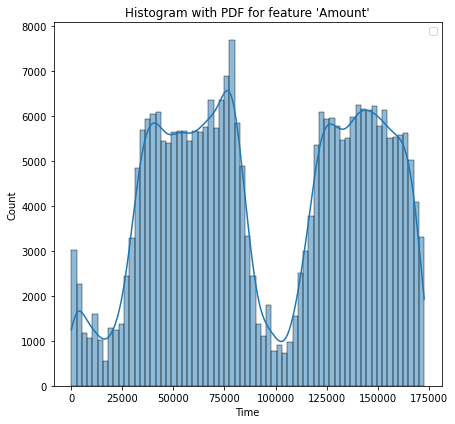

In [7]:
# Renaming the class variables
credit_card_data['Class'] = credit_card_data['Class'].apply(lambda x: 'legitimate' if x == 0 else 'fraud')

# Subsetting the dataset (selecting only required columns which are useful for analysis)
credit_card_data_subset = credit_card_data[['Time', 'Amount', 'Class']]

# Checking the distribution of data
print("Class Distribution:")
print(credit_card_data_subset['Class'].value_counts())

# EDA on 'Time' and 'Amount'
plt.figure(figsize=(12, 6))

# Histograms with PDF for feature 'Time'
plt.subplot(1, 2, 1)
sns.histplot(data=credit_card_data_subset, x='Time', hue='Class', kde=True)
plt.title("Histogram with PDF for feature 'Amount'")
plt.legend()

plt.tight_layout()
plt.show()


## Transaction Amount Distribution by Time of Day
To gain insights into how transaction amounts vary throughout the day, the credit card transaction data was analyzed by converting the Time feature to hours of the day (0-23). This conversion allowed for a comprehensive examination of transaction patterns over different times. The resulting box plot visualizes these insights, where each box represents the interquartile range (IQR) of transaction amounts observed during specific hours. The Hour axis provides a timeline from midnight (0) to the end of the day (23), showing how transaction amounts fluctuate across different periods.

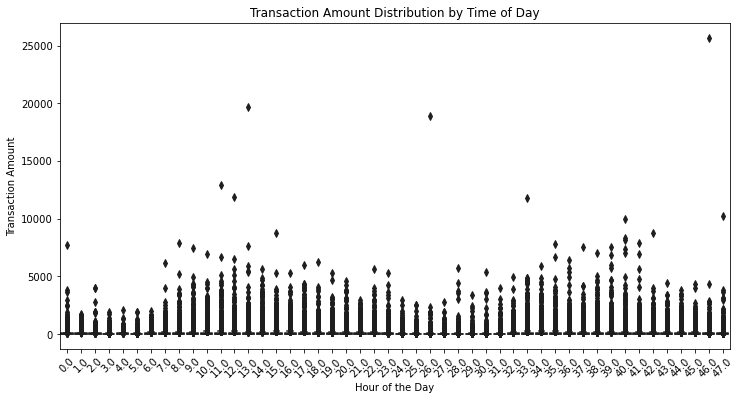

In [21]:
# Convert Time to hours of the day (0-23)
credit_card_data['Hour'] = credit_card_data['Time'] // 3600  # Convert seconds to hours

# Plot the distribution of transaction amounts by hour of the day
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Amount', data=credit_card_data, palette='viridis')
plt.title('Transaction Amount Distribution by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

We analyze the correlation between 'Time', 'Amount', and 'Class' features to understand their relationships.

#### Correlation Matrix Heatmap


#### Observations
The correlation coefficient between Time and Amount is approximately -0.011. This value is close to zero, indicating a very weak linear relationship between the time of the transaction and the transaction amount. This suggests that the time of the transaction does not significantly affect the transaction amount.

In [ ]:
# Correlation Analysis
correlation_matrix = credit_card_data_subset[['Time', 'Amount', 'Class']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Implot
We further explore the relationships between features 'V20', 'V7' and 'Amount' using regression plots.

#### Regression Plots for 'V20' vs 'Amount' and 'V7' vs 'Amount'


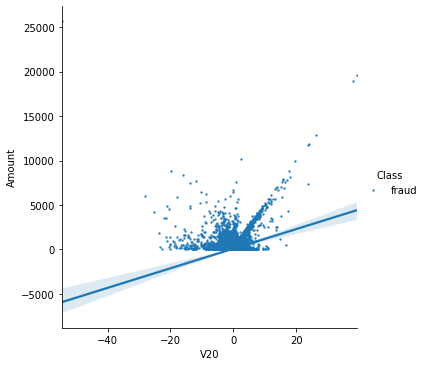

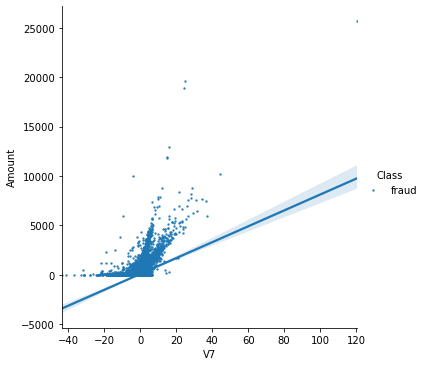

In [14]:
data_df = credit_card_data.copy()

s1 = sns.lmplot(x='V20', y='Amount', data=data_df, hue='Class', fit_reg=True, scatter_kws={'s': 2})
s2 = sns.lmplot(x='V7', y='Amount', data=data_df, hue='Class', fit_reg=True, scatter_kws={'s': 2})

plt.show()


#### Observations

The regression plots for 'V20' vs 'Amount' and 'V7' vs 'Amount' reveal the relationships between these variables, colored by 'Class'. These plots can help identify patterns specific to fraudulent and legitimate transactions.
